# Data preparation

In [222]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [223]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

- I will remove the popularity_confidence and feature_duration_ms columns.
- I will replace the missing values in the "time_signature" column with the mode.
- I will replace the missing values in the "mode" column with the mode (most frequent value).
- I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [224]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


- I will convert the duration of the tracks from ms in minutes

In [225]:
df_copy = df.copy()
df_copy["duration_m"] = df["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
# df_copy.head()
# cond = df_copy['duration_m'] < 0.5
# selected_columns = df_copy[cond][['duration_m']]
# print(selected_columns)
# df_copy.iloc[11931]

Questa da vedere meglio che ci sono troppi outliers

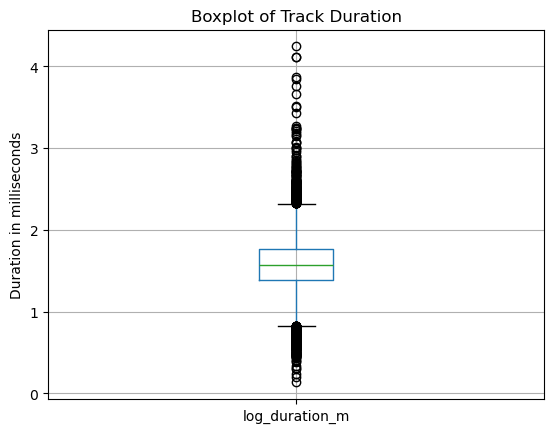

In [226]:
df_copy['log_duration_m'] = np.log(df_copy['duration_m'] + 1)
# Plot the log-transformed data
df_copy.boxplot(column=['log_duration_m'])
plt.title('Boxplot of Track Duration')
plt.ylabel('Duration in milliseconds')
plt.show()

I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [227]:
df = df.sort_values(by='genre')
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,NaN,0.0401,0.181,0.000000,0.0837,0.226,135.951,293107,4.0,654.0,164.0,NaN,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,NaN,0.1450,0.456,0.811000,0.1040,0.963,166.689,194973,4.0,537.0,133.0,NaN,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1.0,0.0585,0.461,0.271000,0.1410,0.731,102.809,178428,4.0,304.0,76.0,0.376,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1.0,0.0604,0.287,0.000532,0.4660,0.745,107.981,238373,4.0,427.0,106.0,NaN,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1.0,0.0533,0.930,0.001000,0.1230,0.429,87.520,221893,4.0,317.0,78.0,NaN,1.279305,afrobeat


I will replace the missing values in the "mode" column with the mode (most frequent value) and i binarize the attribute

I will replace the missing values in the "time_signature" column with the median.

In [228]:
df['time_signature'] = df['time_signature'].fillna(df['time_signature'].mode()[0])
df['time_signature'].isnull().sum()


0

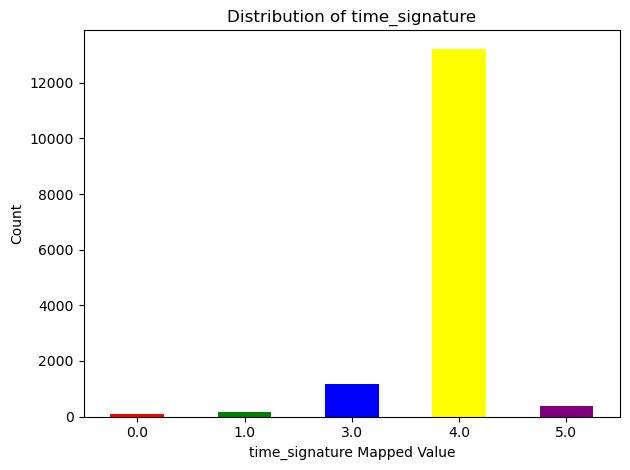

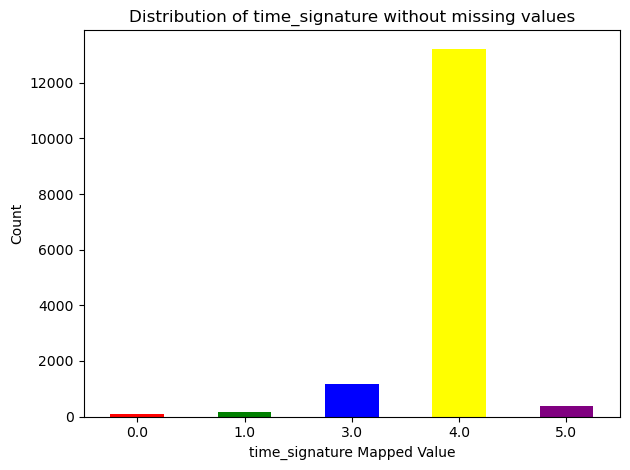

In [229]:
df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature without missing values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

I will remove the popularity_confidence and feature_duration_ms columns.

In [230]:
del df['n_beats']

In [231]:
del df['n_bars']     

In [232]:
del df['features_duration_ms']     

In [233]:
del df['popularity_confidence']     

In [234]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,NaN,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,NaN,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1.0,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1.0,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1.0,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,1.279305,afrobeat


In [235]:
df.dtypes

name                 object
duration_ms           int64
explicit               bool
popularity            int64
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
processing          float64
genre                object
dtype: object

In [236]:
df.shape

(15000, 20)

/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


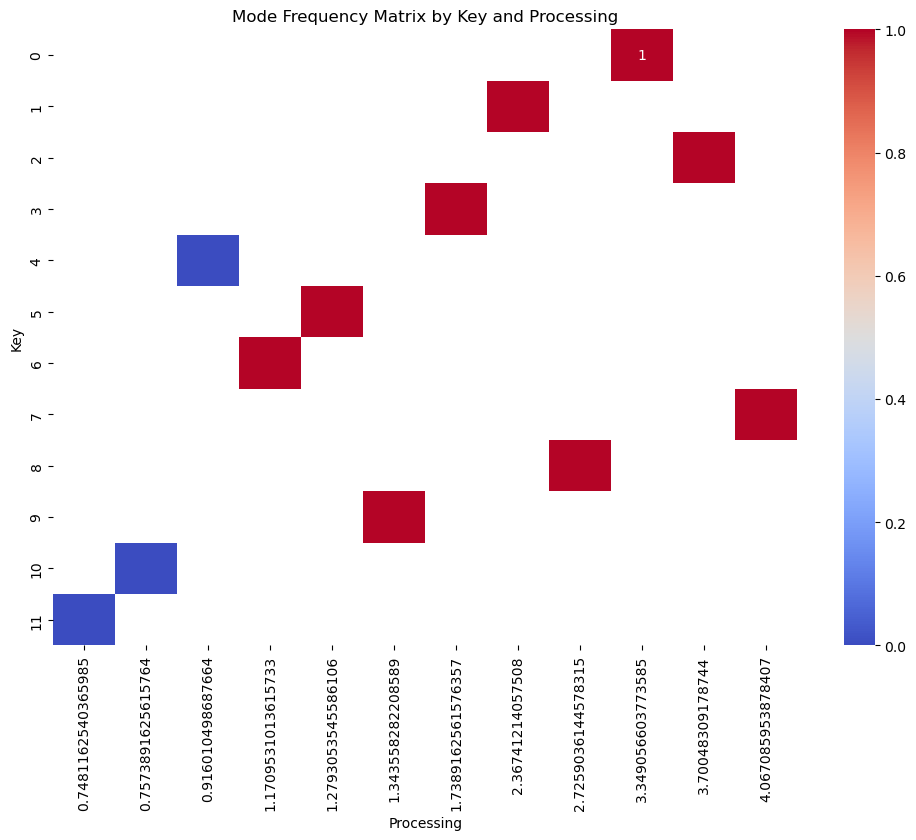

In [237]:
def calc_mode(series):
    if len(series.mode()) > 0:
        return series.mode()[0]
    else:
        return np.nan

mode_pivot_table = df.dropna(subset=['mode']).pivot_table(
    index='key', 
    columns='processing', 
    values='mode', 
    aggfunc=calc_mode, 
    fill_value=np.nan
)

plt.figure(figsize=(12, 8))
sns.heatmap(mode_pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Mode Frequency Matrix by Key and Processing')
plt.xlabel('Processing')
plt.ylabel('Key')
plt.show()

In [238]:
for idx, row in df[df['mode'].isnull()].iterrows():
    key = row['key']
    processing = row['processing']
    # Try to get the mode from the pivot table
    if pd.notnull(mode_pivot_table.loc[key, processing]):
        df.at[idx, 'mode'] = mode_pivot_table.loc[key, processing]
    else:
        # If the mode is not available, use the overall mode
        df.at[idx, 'mode'] = df['mode'].mode()[0]

# Verify there are no more missing values in 'mode'
assert df['mode'].isnull().sum() == 0
df.corr()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.016645,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.008208,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.027404,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,0.047941,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.056281,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.002659,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.058215,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,0.274946,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.069140,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.191553,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.235869,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.026923,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.032519,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.235546,-0.020563
mode,-0.016645,-0.027404,0.056281,-0.058215,-0.069140,-0.235869,-0.032519,1.000000,-0.046989,0.070633,-0.057454,0.013727,-0.001860,-0.012115,-0.010570,0.349916
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.046989,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,0.075101,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.070633,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.131329,0.022684


In [239]:
del df['processing']     

{0.0: 0, 1.0: 1}


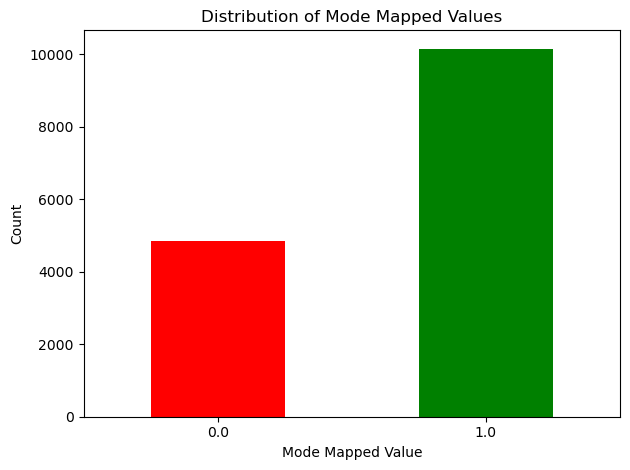

In [240]:
df['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

mode_order = sorted(df['mode'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print(mode_order_mapping)

df['mode'] = df['mode'].map(mode_order_mapping).astype(int)
# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [241]:
print(df.isnull().sum())

name                0
duration_ms         0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
dtype: int64


In [242]:
correlations = df.corr(method="pearson")
print(correlations["mode"])

duration_ms        -0.016645
explicit           -0.027404
popularity          0.056281
danceability       -0.058215
energy             -0.069140
key                -0.235869
loudness           -0.032519
mode                1.000000
speechiness        -0.046989
acousticness        0.070633
instrumentalness   -0.057454
liveness            0.013727
valence            -0.001860
tempo              -0.012115
time_signature     -0.010570
Name: mode, dtype: float64


In [249]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,afrobeat


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 10264 to 9940
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  bool   
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  mode              15000 non-null  int64  
 11  speechiness       15000 non-null  float64
 12  acousticness      15000 non-null  float64
 13  instrumentalness  15000 non-null  float64
 14  liveness          15000 non-null  float64
 15  valence           15000 non-null  float64
 16  tempo             15000 non-null  flo

In [252]:
df.to_csv('dataset_prepared.csv', index=False)

## Data cleaning

In [243]:

# fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# # Histograms on the left
# sns.histplot(df['popularity'], bins=30, kde=True, ax=axes[0, 0])
# axes[0, 0].set_title('Popularity Distribution')

# sns.histplot(df['danceability'], bins=30, kde=True, ax=axes[1, 0])
# axes[1, 0].set_title('Danceability Distribution')

# sns.histplot(df['energy'], bins=30, kde=True, ax=axes[2, 0])
# axes[2, 0].set_title('Energy Distribution')

# sns.histplot(df['tempo'], bins=30, kde=True, ax=axes[3, 0])
# axes[3, 0].set_title('Tempo Distribution')

# # Boxplots on the right
# sns.boxplot(y=df['popularity'], ax=axes[0, 1])
# axes[0, 1].set_title('Popularity Boxplot')

# sns.boxplot(y=df['danceability'], ax=axes[1, 1])
# axes[1, 1].set_title('Danceability Boxplot')

# sns.boxplot(y=df['energy'], ax=axes[2, 1])
# axes[2, 1].set_title('Energy Boxplot')

# sns.boxplot(y=df['tempo'], ax=axes[3, 1])
# axes[3, 1].set_title('Tempo Boxplot')

# plt.tight_layout()
# plt.show()

In [244]:
# Q1 = df['popularity'].quantile(0.2)
# Q2 = df['popularity'].quantile(0.4)
# Q3 = df['popularity'].quantile(0.65)
# Q4 = df['popularity'].quantile(0.85)
# plt.figure(figsize=(12, 6))
# sns.histplot(df['popularity'], bins=50, kde=False)
# plt.axvline(x=Q1, color='blue', linestyle='--', label=f'Q1 = {Q1}')
# plt.axvline(x=Q2, color='green', linestyle='--', label=f'Q2 = {Q2}')
# plt.axvline(x=Q3, color='orange', linestyle='--', label=f'Q3 = {Q3}')
# plt.axvline(x=Q4, color='red', linestyle='--', label=f'Q4 = {Q4}')
# plt.xlabel('Popolarità')
# plt.ylabel('Conteggio')
# plt.title('Istogramma della Popolarità con Linee di Quartile')
# plt.legend()
# plt.show()

In [245]:
# Q1 = df['popularity'].quantile(0.2)
# Q2 = df['popularity'].quantile(0.4)
# Q3 = df['popularity'].quantile(0.65)
# Q4 = df['popularity'].quantile(0.85)
# print(Q4)
# bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
# bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']

# # Assicurati che df sia definito. Se no, crea una copia di df
# df = df.copy()

# # Crea una nuova colonna 'popularity_category' con i valori discretizzati
# df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)

# # Visualizza le prime 10 righe per le colonne 'popularity' e 'popularity_category'
# print(df[["popularity", "popularity_category"]].head(10))

# # Crea un grafico a barre per 'popularity_category'
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x="popularity_category")
# plt.show()
# bin_counts = pd.cut(df['popularity'], bins=bin_edges).value_counts().sort_index()
# print(bin_counts)

In [246]:
# intervals = range(0, 101, 20)  # Questo crea una lista di valori da 0 a 100 con un incremento di 20

# # Visualizziamo un istogramma per la popolarità con le linee dei quartili sostituite dalle linee degli intervalli
# plt.figure(figsize=(12, 6))
# sns.histplot(df['popularity'], bins=50, kde=False)

# # Aggiungiamo linee verticali per ogni intervallo
# for interval in intervals:
#     plt.axvline(x=interval, color='red', linestyle='--', label=f'{interval}')

# plt.xlabel('Popolarità')
# plt.ylabel('Conteggio')
# plt.title('Istogramma della Popolarità con Linee a Intervalli di 20')
# plt.legend(title='Intervalli')
# plt.show()

# # Calcoliamo il numero di canzoni in ogni gruppo di popolarità
# counts = df['popularity'].value_counts(bins=intervals, sort=False)
# counts = counts.sort_index()
# print(counts)

In [247]:
# Definisci i bin edges e le etichette
# bin_edges = [0, 20, 40, 60, 80, 100]
# bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# # Crea una nuova colonna 'popularity_range' con i valori discretizzati
# df['popularity_range'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# # Visualizza le prime 10 righe per la nuova colonna 'popularity_range'
# print(df[['popularity', 'popularity_range']].head(10))

# # Crea un grafico a barre per 'popularity_range'
# sns.countplot(data=df, x='popularity_range'
# plt.show()

# Salvare il DataFrame se necessario
# df.to_csv('path_to_save.csv', index=False)


In [248]:
df.drop_duplicates(inplace=True)